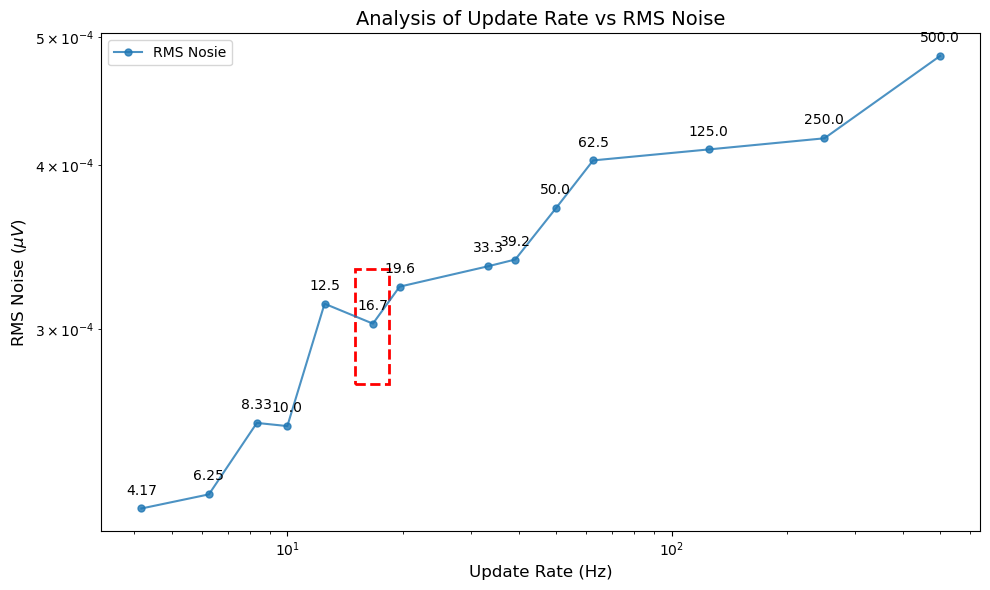

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

file_path = 'RMS.xlsx'
df = pd.read_excel(file_path)

update_rate = df['update rate(Hz)']
rms_noise = df['RMS noise']

plt.figure(figsize=(10, 6))

plt.plot(update_rate, rms_noise, 'o-', label='RMS Nosie', markersize=5, alpha=0.8)

for i in range(len(update_rate)):

    if i > 0 and abs(np.log10(update_rate[i]) - np.log10(update_rate[i-1])) < 0.05:
        offset = (-20, 15) if i % 2 == 0 else (20, -15)
    else:
        offset = (0, 10)
    plt.annotate(f'{update_rate[i]}', 
                 (update_rate[i], rms_noise[i]), 
                 textcoords="offset points", 
                 xytext=offset, ha='center', fontsize=10)

# Highlight specific points with a rectangle
highlight_points = [16.7]
for hp in highlight_points:
    idx = update_rate[update_rate == hp].index[0]
    plt.gca().add_patch(patches.Rectangle(
        (update_rate[idx] * 0.9, rms_noise[idx] * 0.9),   
        update_rate[idx] * 0.2, rms_noise[idx] * 0.2,   
        linewidth=2, edgecolor='red', facecolor='none', linestyle='--'))

plt.xscale('log')
plt.yscale('log')

plt.title('Analysis of Update Rate vs RMS Noise', fontsize=14)
plt.xlabel('Update Rate (Hz)', fontsize=12)
plt.ylabel('RMS Noise ($\mu V$)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()


   Set Voltage(V)  Measured Voltage(V)  P-P Noise(V)  RMS Noise(V)
0            0.00         5.198609e-07      0.000021      0.000003
1            0.05         4.093804e-02      0.001733      0.000312
2            0.10         8.761463e-02      0.002498      0.000327
3            0.15         1.423132e-01      0.002709      0.000373
4            0.20         1.906363e-01      0.002692      0.000404


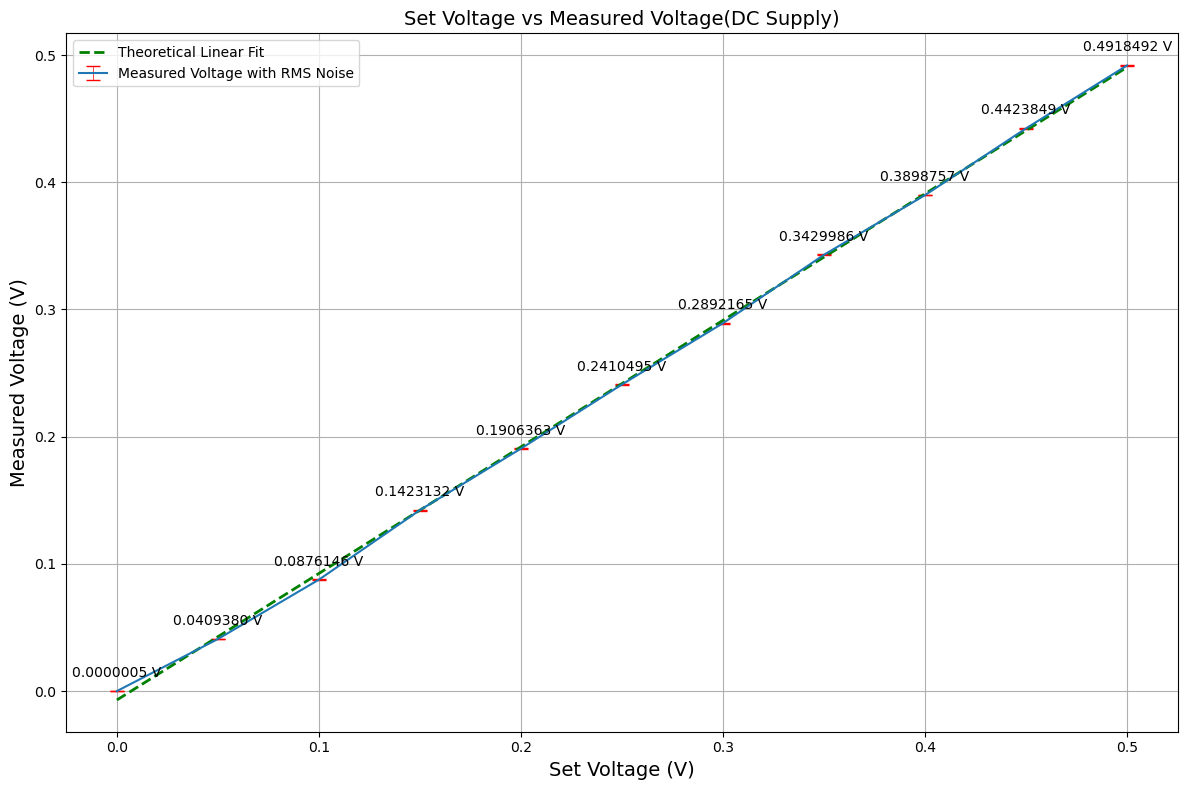

In [82]:
file_path = 'linear.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Extract data from the dataframe
set_voltage = df['Set Voltage(V)']
measured_voltage = df['Measured Voltage(V)']
rms_noise = df['RMS Noise(V)']  
pp_noise = df['P-P Noise(V)']  


error = rms_noise  # Or use pp_noise if applicable


coefficients = np.polyfit(set_voltage, measured_voltage, 1)
linear_fit = np.polyval(coefficients, set_voltage)

# Plotting the data with error bars and the theoretical linear fit
plt.figure(figsize=(12, 8))
plt.errorbar(set_voltage, measured_voltage, yerr=error, fmt='-', ecolor='red', elinewidth=0.5, capthick=1, capsize=5, label='Measured Voltage with RMS Noise')
plt.plot(set_voltage, linear_fit, 'g--', label='Theoretical Linear Fit', linewidth=2)  # Theoretical linear fit

for i in range(0, len(measured_voltage), max(1, len(measured_voltage)//10)):  # Annotate every 10% of points
    plt.annotate(f'{measured_voltage[i]:.7f} V', (set_voltage[i], measured_voltage[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Set Voltage vs Measured Voltage(DC Supply)', fontsize=14)
plt.xlabel('Set Voltage (V)', fontsize=14)
plt.ylabel('Measured Voltage (V)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


   Set(mV)  Measure(V)  rmsnoise(V)
0        0    0.047848     0.000029
1      100    0.054872     0.000035
2      200    0.072249     0.000047
3      300    0.091532     0.000032
4      400    0.101641     0.000027


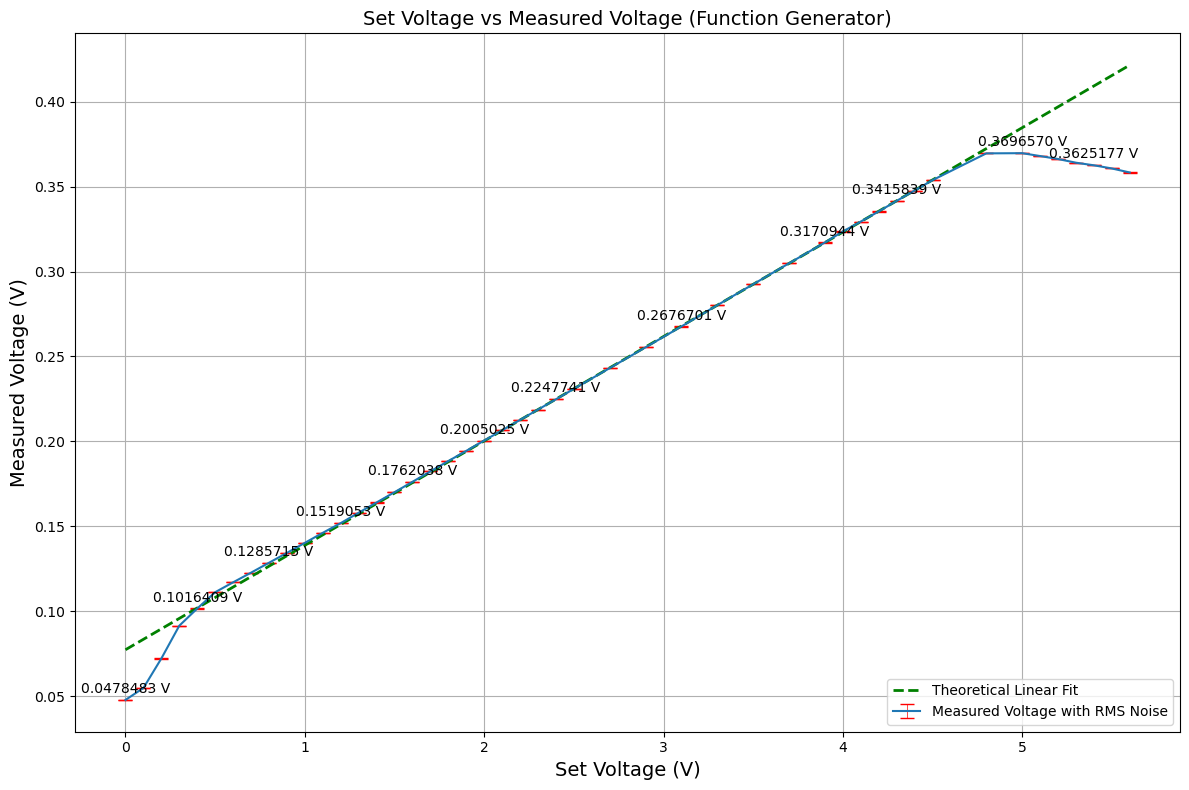

In [87]:
set_voltage = df['Set(mV)']  
measured_voltage = df['Measure(V)']
rms_noise = df['rmsnoise(V)'] 

# Convert Set(mV) to Volts
set_voltage = set_voltage / 1000  # Convert mV to V

# Define the linear region (selecting the middle portion manually)
linear_region = (measured_voltage > 0.2) & (measured_voltage < 0.35)  # Adjust this threshold to select the linear region

coefficients = np.polyfit(set_voltage[linear_region], measured_voltage[linear_region], 1)

extended_set_voltage = np.linspace(0, set_voltage.max(), 100)
extended_linear_fit = np.polyval(coefficients, extended_set_voltage)

plt.figure(figsize=(12, 8))
plt.errorbar(set_voltage, measured_voltage, yerr=rms_noise, fmt='-', 
             ecolor='red', elinewidth=0.5, capthick=1, capsize=5, 
             label='Measured Voltage with RMS Noise', markersize=2)

plt.plot(extended_set_voltage, extended_linear_fit, 'g--', label='Theoretical Linear Fit', linewidth=2)

for i in range(0, len(measured_voltage), max(1, len(measured_voltage)//10)):  # Annotate every 10% of points
    plt.annotate(f'{measured_voltage[i]:.7f} V', (set_voltage[i], measured_voltage[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

plt.title('Set Voltage vs Measured Voltage (Function Generator)', fontsize=14)
plt.xlabel('Set Voltage (V)', fontsize=14)
plt.ylabel('Measured Voltage (V)', fontsize=14)
plt.legend(loc='lower right')  
plt.grid(True)
plt.tight_layout()

plt.show()


0    0.000000
1    1.822434
2    2.768193
3    3.277555
4    3.935424
dtype: float64


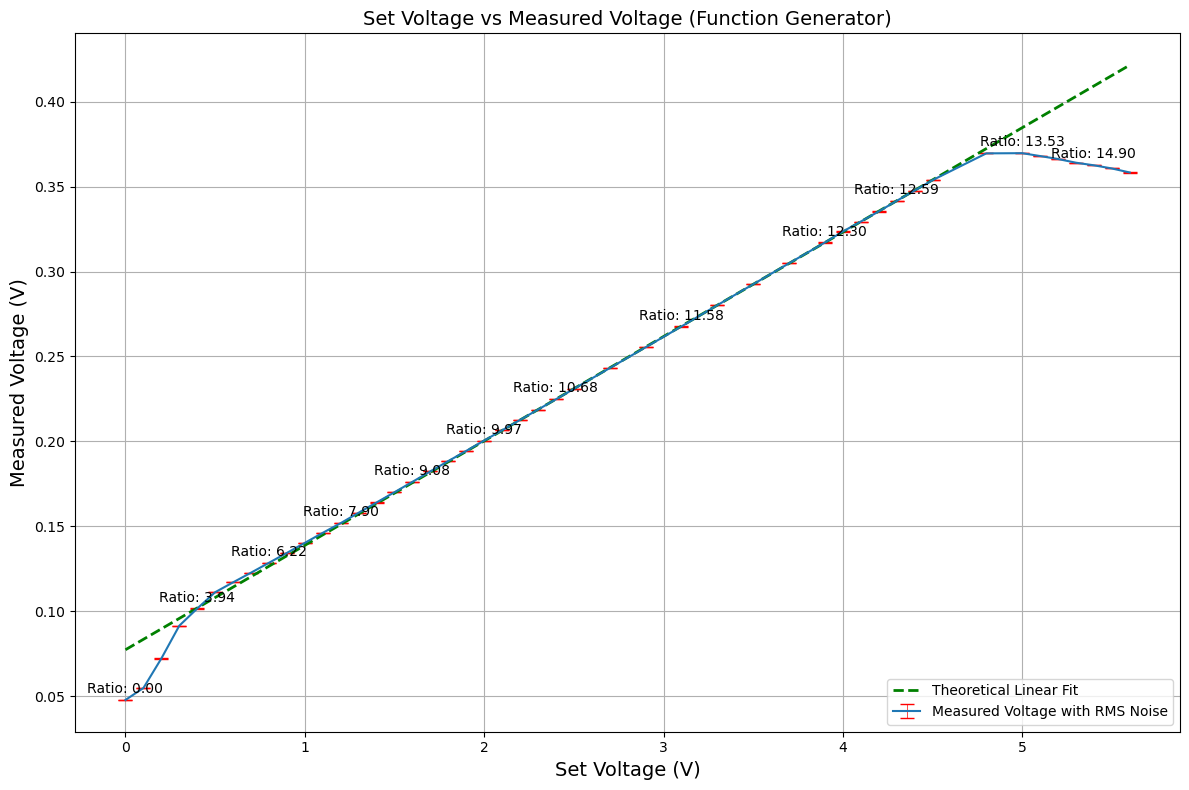

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '3.xlsx' 
df = pd.read_excel(file_path)


set_voltage = df['Set(mV)'] 
measured_voltage = df['Measure(V)']
rms_noise = df['rmsnoise(V)']  

set_voltage = set_voltage / 1000  # Convert mV to V

# Calculate the ratio between Set Voltage and Measured Voltage
ratios = set_voltage / measured_voltage

print(ratios.head())

# Define the linear region (selecting the middle portion manually)
linear_region = (measured_voltage > 0.2) & (measured_voltage < 0.35)  # Adjust this threshold to select the linear region

# Calculate the linear fit for the selected linear region
coefficients = np.polyfit(set_voltage[linear_region], measured_voltage[linear_region], 1)

# Generate a line across the full range of x-axis starting from 0
extended_set_voltage = np.linspace(0, set_voltage.max(), 100)
extended_linear_fit = np.polyval(coefficients, extended_set_voltage)

# Plotting the data with error bars and the theoretical linear fit
plt.figure(figsize=(12, 8))
plt.errorbar(set_voltage, measured_voltage, yerr=rms_noise, fmt='-', 
             ecolor='red', elinewidth=0.5, capthick=1, capsize=5, 
             label='Measured Voltage with RMS Noise', markersize=2)

plt.plot(extended_set_voltage, extended_linear_fit, 'g--', label='Theoretical Linear Fit', linewidth=2)

# Annotate only a subset of the data points with their ratio
for i in range(0, len(measured_voltage), max(1, len(measured_voltage)//10)):  # Annotate every 10% of points
    plt.annotate(f'Ratio: {ratios[i]:.2f}', (set_voltage[i], measured_voltage[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

plt.title('Set Voltage vs Measured Voltage (Function Generator)', fontsize=14)
plt.xlabel('Set Voltage (V)', fontsize=14)
plt.ylabel('Measured Voltage (V)', fontsize=14)
plt.legend(loc='lower right') 
plt.grid(True)
plt.tight_layout()

plt.show()


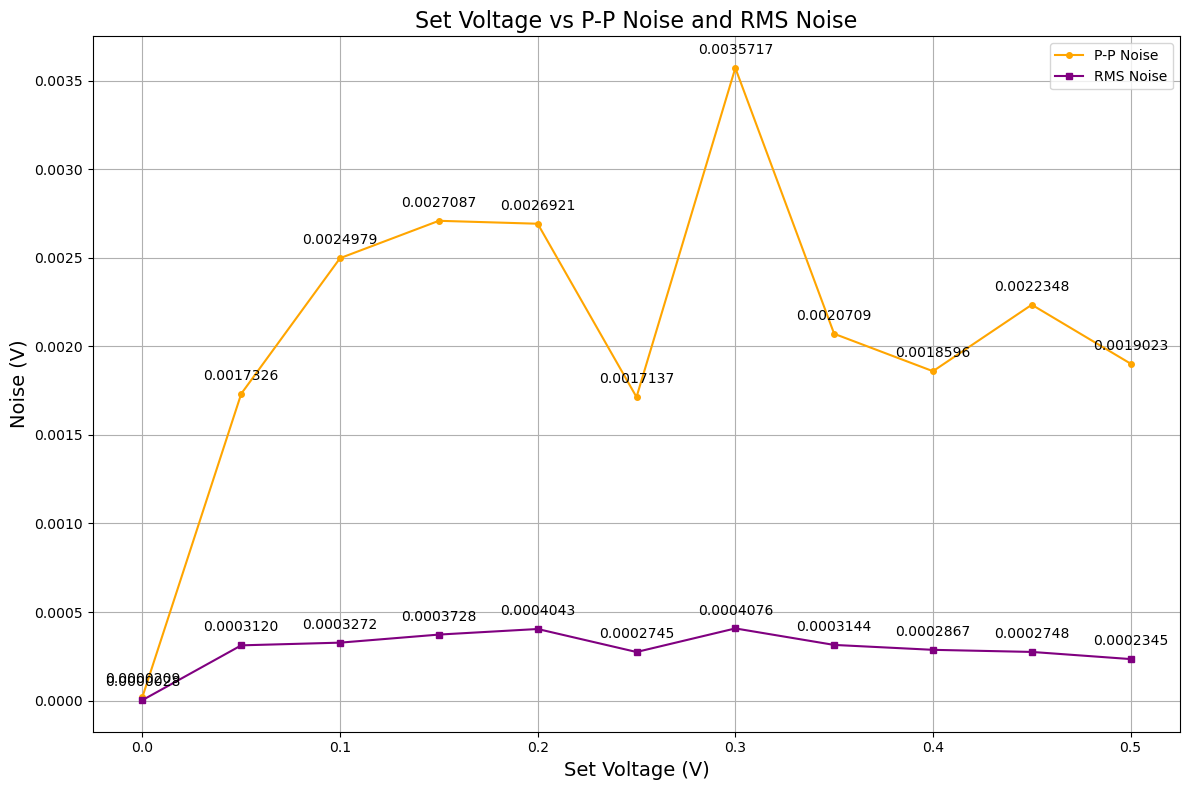

In [4]:
plt.figure(figsize=(12, 8))

plt.plot(set_voltage, pp_noise, 'o-', label='P-P Noise', color='orange', markersize=4)
for i in range(len(set_voltage)):
    plt.annotate(f'{pp_noise[i]:.7f}', (set_voltage[i], pp_noise[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(set_voltage, rms_noise, 's-', label='RMS Noise', color='purple', markersize=4)
for i in range(len(set_voltage)):
    plt.annotate(f'{rms_noise[i]:.7f}', (set_voltage[i], rms_noise[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Set Voltage vs P-P Noise and RMS Noise', fontsize=16)
plt.xlabel('Set Voltage (V)', fontsize=14)
plt.ylabel('Noise (V)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

  Samples - Plot 0  Volts - Plot 0
0                0        0.663032
1                1        0.662963
2                2        0.662902
3                3        0.662955
4                4        0.662997
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65537 entries, 0 to 65536
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Samples - Plot 0  65537 non-null  object 
 1   Volts - Plot 0    65537 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB
None


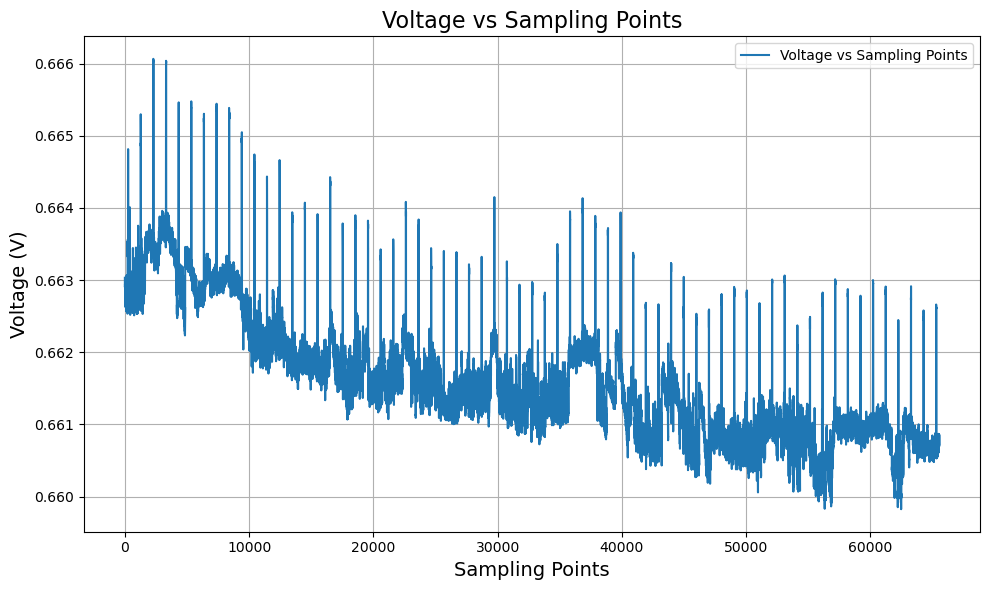

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '16.7hz_3.86M_0.8VIN.xltx'
df = pd.read_excel(file_path)

print(df.head())
print(df.info())

def convert_k_values(value):
    if isinstance(value, str) and 'k' in value:
        return float(value.replace('k', '')) * 1000
    return float(value)

df['Samples - Plot 0'] = df['Samples - Plot 0'].apply(convert_k_values)

df['Volts - Plot 0'] = df['Volts - Plot 0']

df.dropna(inplace=True)

sampling_points = df['Samples - Plot 0']
voltage = df['Volts - Plot 0']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(sampling_points, voltage, '-', label='Voltage vs Sampling Points')

# Adding titles and labels
plt.title('Voltage vs Sampling Points', fontsize=16)
plt.xlabel('Sampling Points', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [6]:
import spidev
import time
import numpy as np

class AD7793:
    COMM_WRITE = 0x10  # Command to write to a register
    COMM_READ = 0x90   # Command to read from a register
    REG_STATUS = 0x00  # Status register
    REG_MODE = 0x01    # Mode register
    REG_CONFIG = 0x02  # Configuration register
    REG_DATA = 0x03    # Data register
    REG_ID = 0x04      # ID register
    REG_IO = 0x05      # IO register (if applicable)

    def __init__(self, bus=0, device=0, max_speed_hz=50000):
        """Initialize the SPI device"""
        self.spi = spidev.SpiDev()
        self.spi.open(bus, device)
        self.spi.max_speed_hz = max_speed_hz

    def close(self):
        """Close the SPI connection"""
        self.spi.close()

    def write_register(self, register, value):
        """Write a 16-bit value to a register"""
        self.spi.xfer2([self.COMM_WRITE | register, (value >> 8) & 0xFF, value & 0xFF])

    def read_register(self, register, length=2):
        """Read a value from a register"""
        response = self.spi.xfer2([self.COMM_READ | register] + [0x00] * length)
        return response[1:]

    def initialize(self):
        """Initialize the AD7793 by resetting and setting mode and config registers"""
        # Reset the AD7793
        self.spi.xfer2([0xFF] * 4)
        time.sleep(0.1)  # Wait for reset to complete

        # Set mode register to continuous conversion mode (0x200A)
        # This can be modified to set a different mode or configuration
        self.write_register(self.REG_MODE, 0x200A)

        # Set configuration register (example configuration: 0x0710)
        # Modify this value based on your specific requirements
        self.write_register(self.REG_CONFIG, 0x0710)

    def read_data(self):
        """Read 24-bit data from the data register and handle negative values"""
        data_bytes = self.read_register(self.REG_DATA, 3)
        data = (data_bytes[0] << 16) | (data_bytes[1] << 8) | data_bytes[2]
        if data & 0x800000:  # Handle negative values
            data -= 1 << 24
        return data

    def read_temperature(self):
        """Example function to read temperature if applicable"""
        temp_bytes = self.read_register(self.REG_IO, 2)
        temp_data = (temp_bytes[0] << 8) | temp_bytes[1]
        return temp_data

    def zero_calibration(self, samples=100):
        """Perform zero calibration by averaging multiple samples"""
        data = [self.read_data() for _ in range(samples)]
        zero_offset = np.mean(data)
        return zero_offset

    def full_scale_calibration(self, full_scale_input, samples=100):
        """Perform full scale calibration by averaging multiple samples with known input"""
        data = [self.read_data() for _ in range(samples)]
        full_scale_output = np.mean(data)
        return full_scale_output

    def measure_noise(self, samples=1000):
        """Measure peak-to-peak noise and RMS noise"""
        data = [self.read_data() for _ in range(samples)]
        pp_noise = np.ptp(data)  # Peak-to-peak noise
        rms_noise = np.sqrt(np.mean(np.square(data)))  # RMS noise
        return pp_noise, rms_noise

if __name__ == "__main__":
    # Initialize AD7793 object with default SPI bus and device
    ad7793 = AD7793()

    try:
        # Initialize the AD7793
        ad7793.initialize()
        
        print("Performing zero calibration...")
        zero_offset = ad7793.zero_calibration(samples=100)  # Modify sample count if needed
        print(f"Zero offset: {zero_offset}")

        # Known full-scale input value for calibration (modify as needed)
        full_scale_input = 1.0
        print("Performing full scale calibration...")
        full_scale_output = ad7793.full_scale_calibration(full_scale_input, samples=100)  # Modify sample count if needed
        print(f"Full scale output: {full_scale_output}")

        print("Measuring noise...")
        pp_noise, rms_noise = ad7793.measure_noise(samples=1000)  # Modify sample count if needed
        print(f"Peak-to-Peak Noise: {pp_noise}")
        print(f"RMS Noise: {rms_noise}")

        while True:
            # Read raw data and convert to calibrated voltage
            raw_data = ad7793.read_data()
            voltage = (raw_data - zero_offset) / (full_scale_output - zero_offset) * full_scale_input
            print("Calibrated ADC Voltage:", voltage)
            time.sleep(1)  # Adjust delay as needed
    
    except KeyboardInterrupt:
        print("Measurement stopped by user.")
    
    finally:
        # Ensure SPI connection is closed properly
        ad7793.close()


ModuleNotFoundError: No module named 'spidev'